# Homework 4 Question 2 (Business Cycle Fluctuations)

In [7]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D
import math
from math import exp
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from math import log
from scipy.stats import norm
plt.style.use("ggplot")

In [9]:
theta = 0.679
beta = 0.988
delta = 0.013
h = 1
k = 1
kappa = 5.24
v = 2.0
z=[1.01, 1/1.01]

In [10]:
PI = [0]*2
PI[0]=[0]*2
PI[1]=[0]*2

PI[0][0] = norm.cdf(1-1.01)
PI[0][1] = 1-norm.cdf(1-1.01)
PI[1][0] = norm.cdf(1-(1/1.01))
PI[1][1] = 1-norm.cdf(1-(1/1.01))

PI

[[0.4960106436853684, 0.5039893563146316],
 [0.5039498590343722, 0.49605014096562783]]

In [ ]:
#Labor Fixed
def m(ki, kj, z):
    c = z*ki**(1-theta)*(h)**theta+(1-delta)-kj
    #Step 4 (consumption must be non negative)
    if c >= 0:
        return math.log(c) - kappa*(1/(1+1/v))
    else:
        return -10000000

# 2

In [25]:
#%%time
# p = 100 , k_max = 2 ====>>> 5,5sekund

k_min = 0.01
k_max = 2
p = 10

#Tauchen Method (1986)
z_max = 1.01
z_min = 1/1.01


z = np.linspace(z_min, z_max, p)
z_mid = (z_max+z_min)/2



#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k
z = [1.01, 1/1.01]

#Step 2
V = []
V.append(np.zeros(p*2)) #Guess a solution
V.append(np.zeros(p*2))
k_dec = []
k_dec.append(np.zeros(p*2))

kj_dec = []
kj_dec.append(np.zeros(p*2))


#Step 3
#Define the return matrix M
M1 = [0]*p
Chi = [0]*(2*p)
for i in range(p):
    M1[i] = [0] * p

    
for i in range(p):
    for j in range(p):       
        M1[i][j] = m(k[i], k[j], 1.01)
    
M2 = [0]*p
for i in range(p):
    M2[i] = [0] * p

    
for i in range(p):
    for j in range(p):       
        M2[i][j] = m(k[i], k[j], 1/1.01)

M = np.concatenate((M1, M2), axis=0)


Chi = [0]* (p*2)    
for i in range(p*2):
    Chi[i] = [0] * p

#Step 5.0: Compute the matrix Wsq×p,
W = [0]* 2
for i in range(2):
    W[i] = [0] * p
    

for j in range(p):
    for i in range(2):
        W[i][j] = PI[i][0]*V[-1][j] + PI[i][1]*V[-1][p+j]
            
            
for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* W[0][j]
        
for i in range(p,2*p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* W[1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p*2
k_dec_new = [0]*p
for i in range(p*2):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

    
V.append(V_new)
#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for j in range(p):
        for i in range(2):
            W[i][j] = PI[i][0]*V[-1][j] + PI[i][1]*V[-1][p+j-1]

    for i in range(p):
        for j in range(p):
            Chi[i][j] = M[i][j] + beta* W[0][j]

    for i in range(p,p*2):
        for j in range(p):
            Chi[i][j] = M[i][j] + beta* W[1][j]
    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*(p*2)
    k_dec_new = [0]*p*2
    for i in range(p*2):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    
    Vz1 = V[-1][:p]
    Vz2 = V[-1][p:2*p]
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

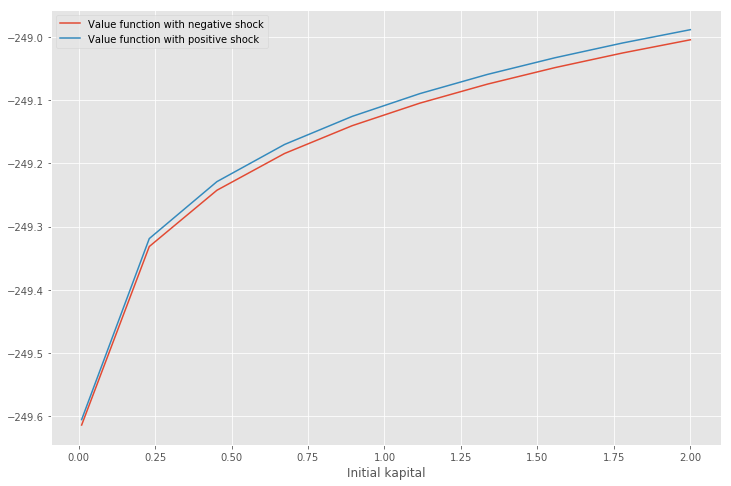

In [27]:
def plot2B():
    plt.plot(k, Vz2, label='Value function with negative shock')
    plt.plot(k, Vz1, label='Value function with positive shock')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot2B()